In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from statsmodels.tsa.filters.hp_filter import hpfilter

In [10]:
df = pd.read_csv('bitstamp_cleaned.csv')

In [11]:
df.head()

,Unix_Timestamp,DateTime,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,12/31/2011 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,12/31/2011 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,12/31/2011 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,12/31/2011 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,01/01/2012 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330541 entries, 0 to 3330540
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unix_Timestamp     int64  
 1   DateTime           object 
 2   Open               float64
 3   High               float64
 4   Low                float64
 5   Close              float64
 6   Volume_(BTC)       float64
 7   Volume_(Currency)  float64
 8   Weighted_Price     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 228.7+ MB


In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330541 entries, 0 to 3330540
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Unix_Timestamp     int64         
 1   DateTime           datetime64[ns]
 2   Open               float64       
 3   High               float64       
 4   Low                float64       
 5   Close              float64       
 6   Volume_(BTC)       float64       
 7   Volume_(Currency)  float64       
 8   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 228.7 MB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price of BTC over the period')

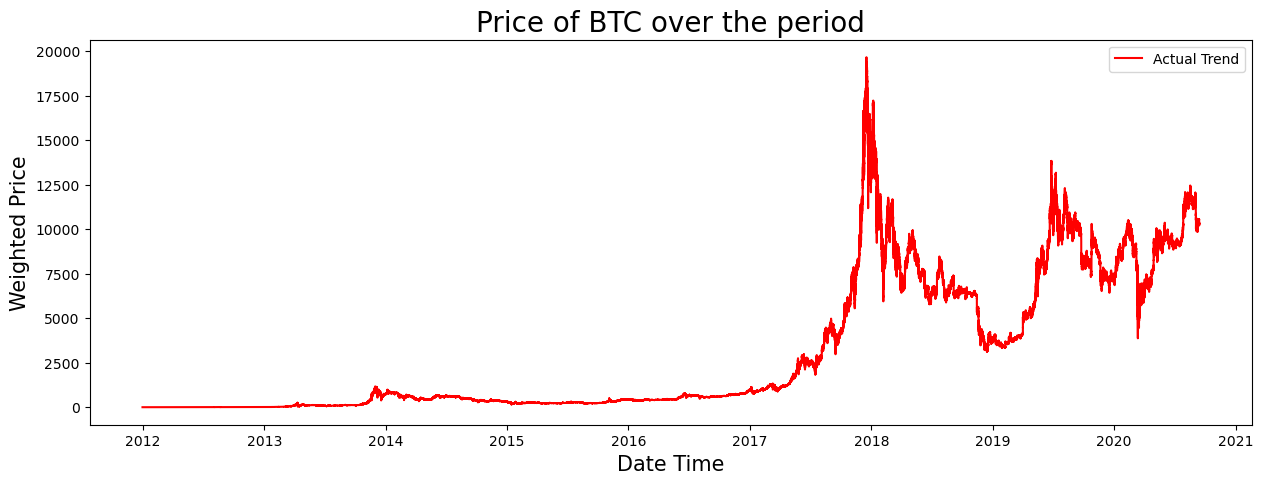

In [7]:
plt.figure(figsize=(15,5))
sns.lineplot(x='DateTime', y='Weighted_Price', data=df, legend=True, color='r', label='Actual Trend')
plt.ylabel('Weighted Price', fontsize=15)
plt.xlabel('Date Time', fontsize=15)
plt.title('Price of BTC over the period', fontsize=20)

In [1]:
df.corr()

NameError: name 'df' is not defined

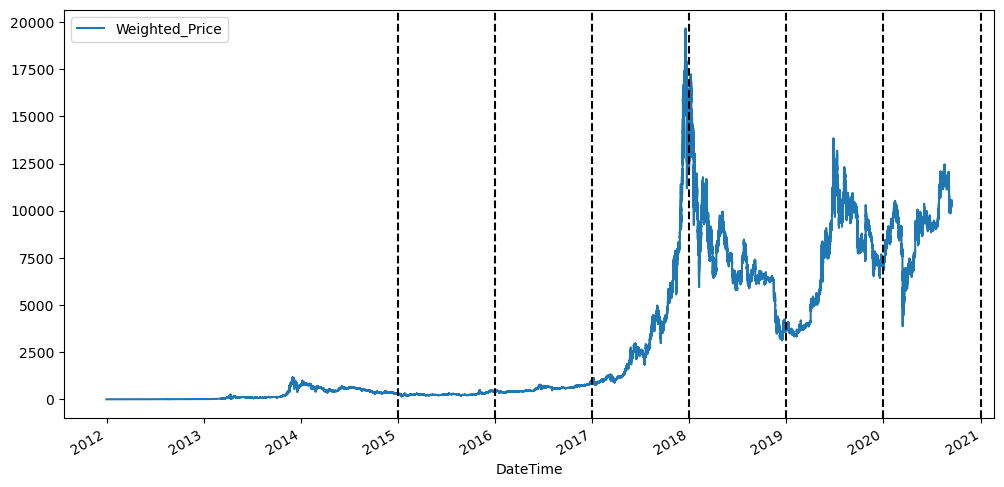

In [8]:
ax = df.plot(x='DateTime', y='Weighted_Price', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
          '2021-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decompose_result = seasonal_decompose(df[‘Weighted_Price’],model=’multiplicative’)
decompose_result.plot();

SyntaxError: invalid character '‘' (U+2018) (2039543708.py, line 2)

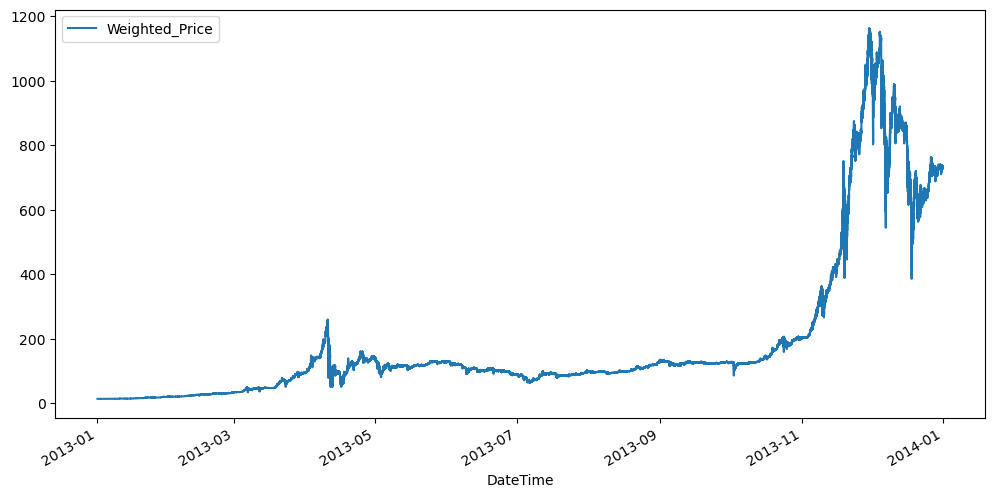

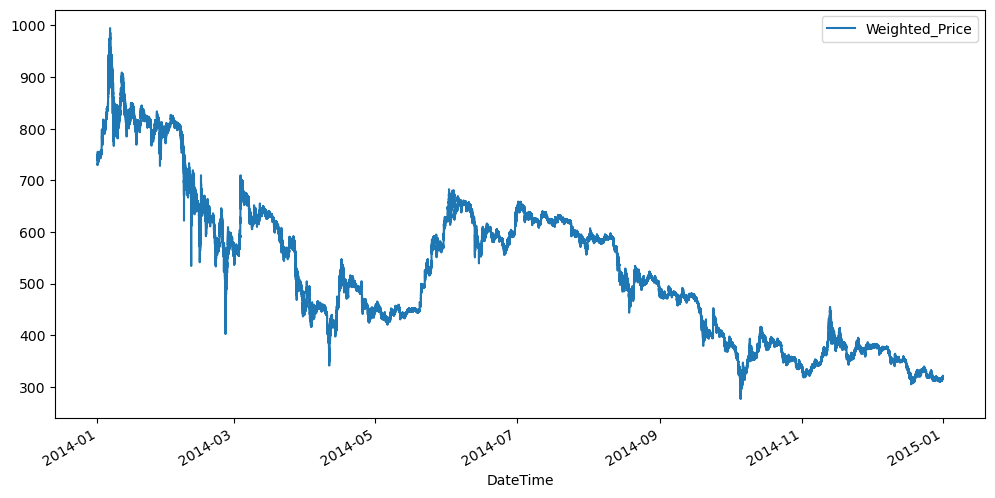

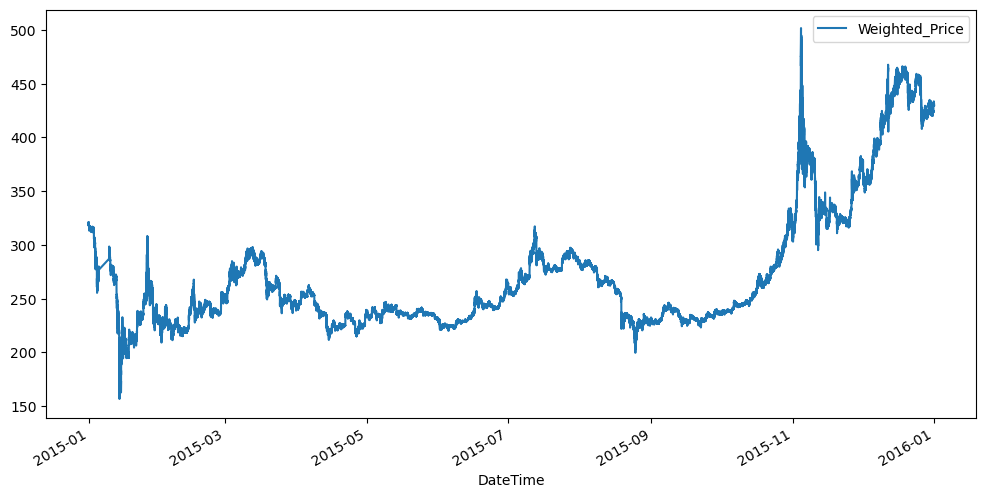

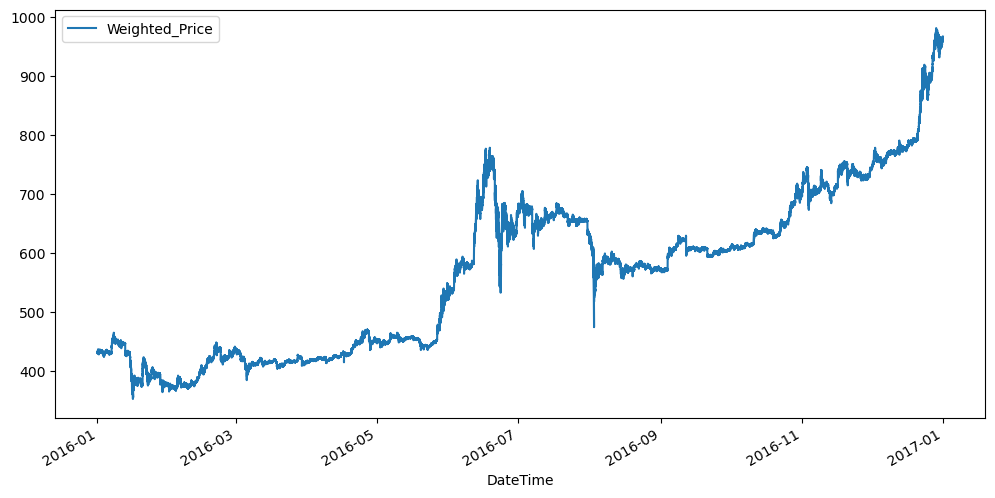

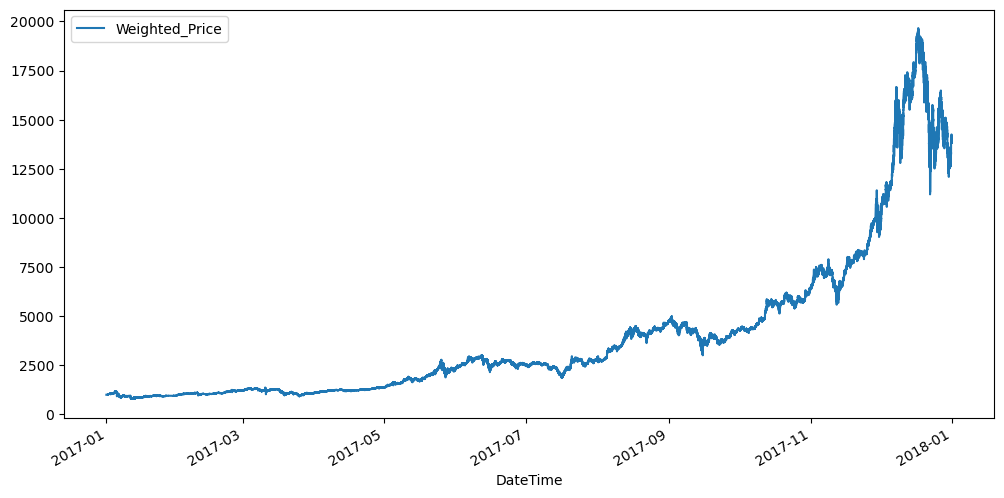

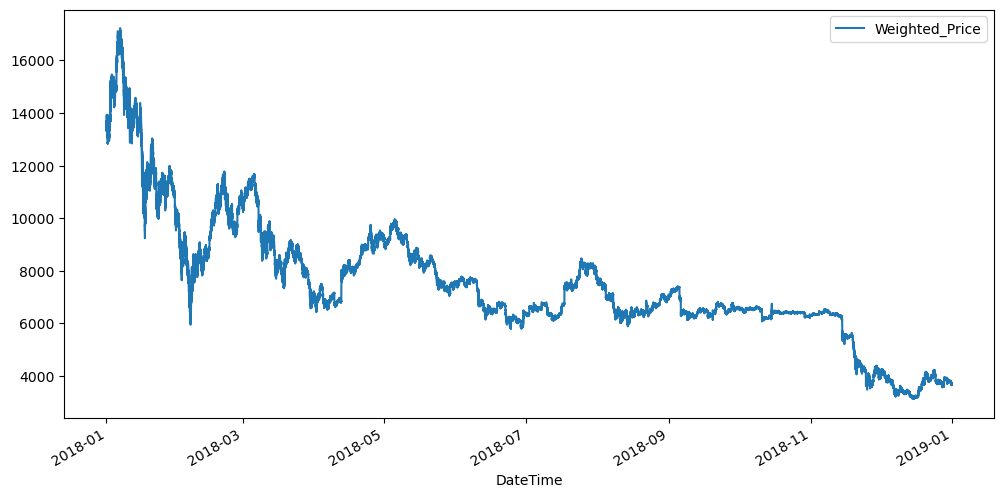

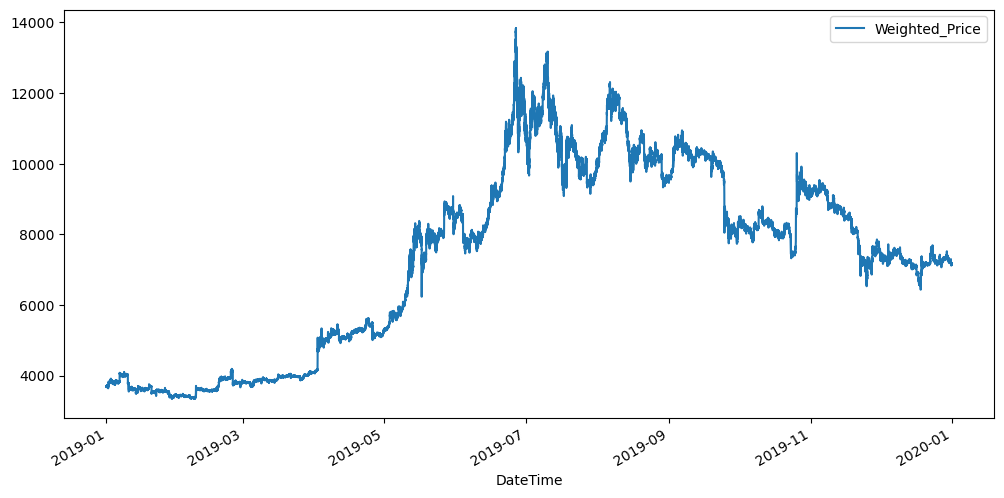

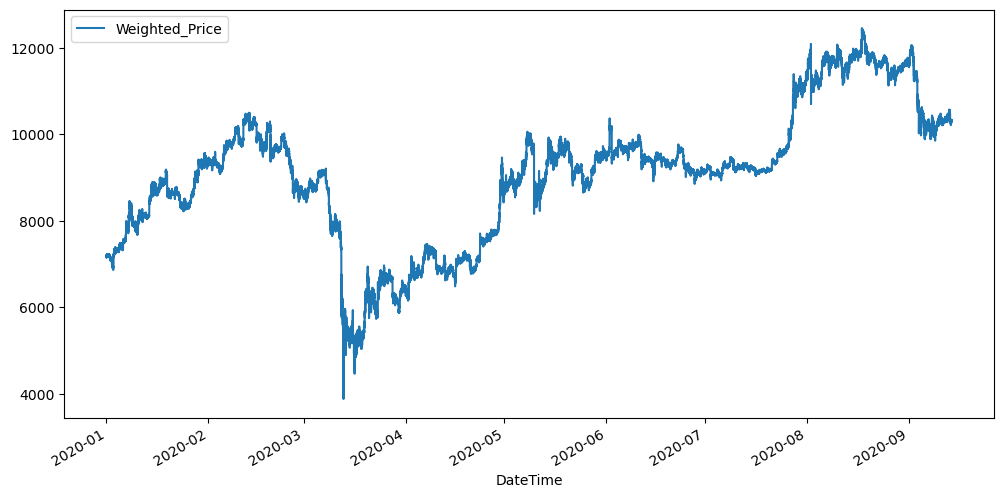

In [9]:
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
for year in years:
    filtered_df = df[df['DateTime'].dt.year == year]
    ax = filtered_df.plot(x='DateTime', y='Weighted_Price', figsize=(12,6))
# xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01','2021-01-01']
# for xc in xcoords:
#     plt.axvline(x=xc, color='black', linestyle='--')

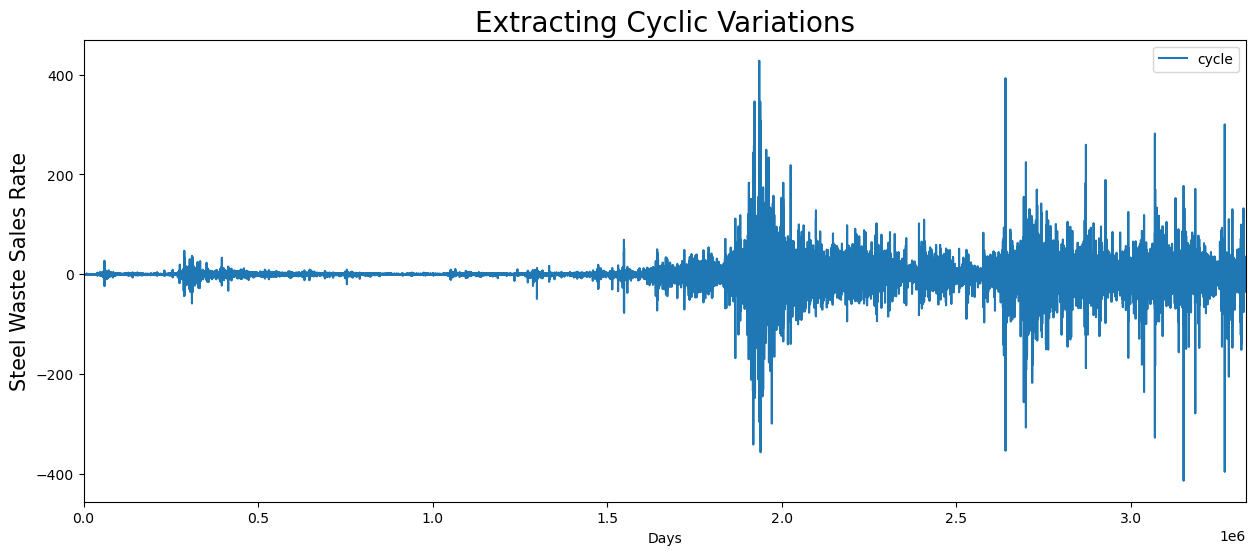

In [10]:
sw_cycle,sw_trend = hpfilter(df['Weighted_Price'], lamb=100)
df['cycle'] =sw_cycle
df['trend'] =sw_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=20)
plt.xlabel('Days')
plt.ylabel('Steel Waste Sales Rate', fontsize =15)
plt.show()

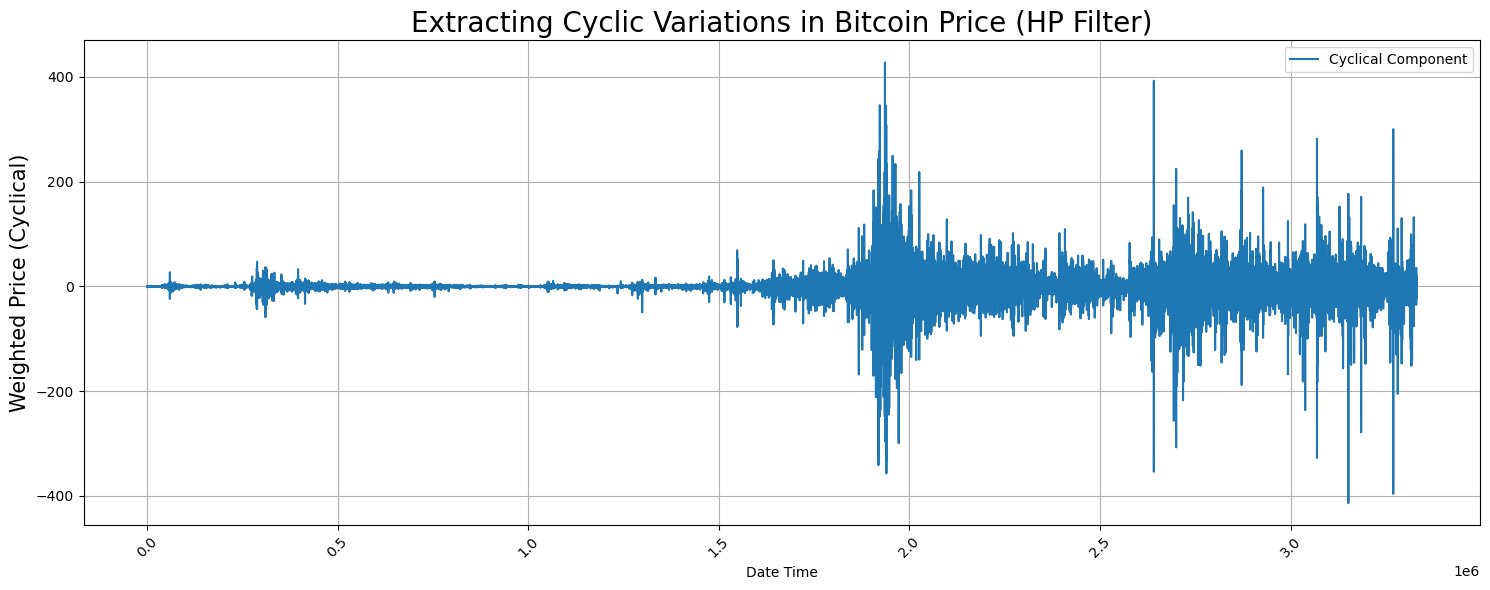

In [11]:
# Assuming your DataFrame is called 'df' and the price column is 'Weighted_Price'

# Set the lambda parameter (controls smoothness of trend)
lambda_value = 100  # Experiment with different values

# Apply HP filter to extract trend and cycle components
sw_cycle, sw_trend = hpfilter(df['Weighted_Price'], lamb=lambda_value)

# Add cycle and trend columns to your DataFrame
df['cycle'] = sw_cycle
df['trend'] = sw_trend

# Plot the cycle component
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['cycle'], label='Cyclical Component')
plt.title('Extracting Cyclic Variations in Bitcoin Price (HP Filter)', fontsize=20)
plt.xlabel('Date Time')
plt.ylabel('Weighted Price (Cyclical)', fontsize=15)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

NameError: name 'matplotlib' is not defined

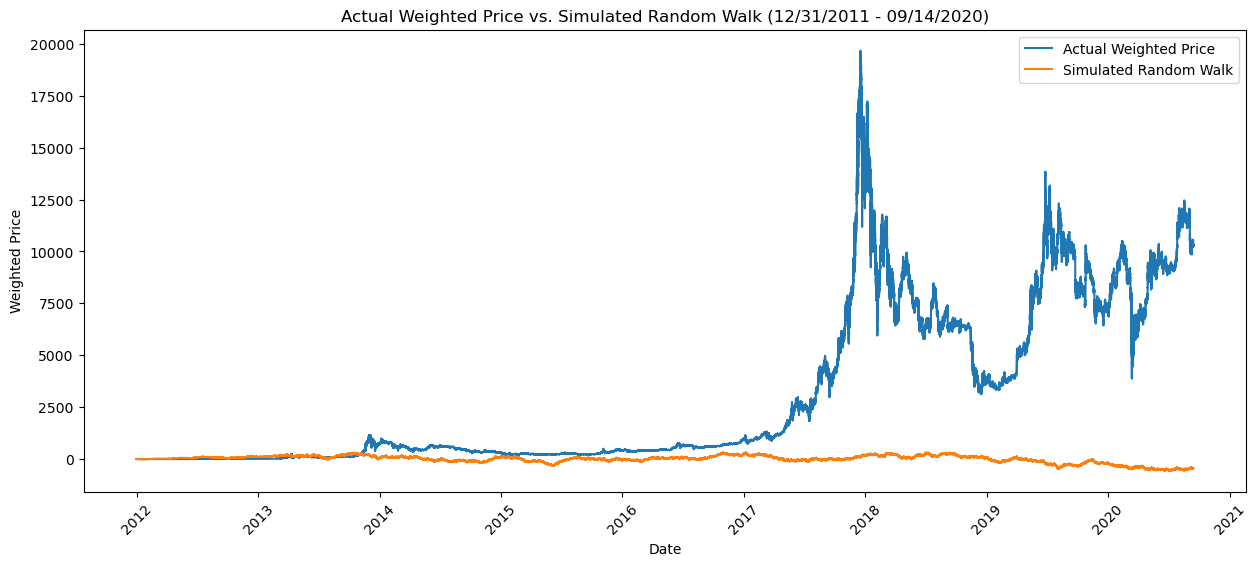

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is called 'df' and the price column is 'Weighted_Price'

# Extract starting value and data length
starting_value = df['Weighted_Price'].iloc[0]  # First value in 'Weighted_Price'
data_length = len(df)  # Number of rows in the DataFrame

# Simulate random walk (modify volatility as needed)
# Here, 'volatility' controls the average step size (absolute value)
volatility = 0.5  # Adjust this value to influence step sizes

random_steps = np.random.normal(loc=0, scale=volatility, size=data_length)  # Normally distributed steps

# Calculate walk series (starting value + accumulated steps)
walk_series = np.cumsum(random_steps) + starting_value

# Create time series for the walk (assuming 'DateTime' column exists)
# Adjust the date format and column name if necessary
time_series = pd.to_datetime(df['DateTime'])  # Assuming 'DateTime' column exists

# Plot actual data and simulated walk
plt.figure(figsize=(15, 6))
plt.plot(time_series, df['Weighted_Price'], label='Actual Weighted Price')
plt.plot(time_series, walk_series, label='Simulated Random Walk')
plt.xlabel('Date')
plt.ylabel('Weighted Price')
plt.title('Actual Weighted Price vs. Simulated Random Walk (12/31/2011 - 09/14/2020)')
plt.legend()
# plt.grid(True)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adjust time format for the x-axis labels (optional)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))  # Year-Month format

plt.tight_layout()
plt.show()


# Random Walk Model

In [13]:
# Assuming your DataFrame is called 'df' and the price column is 'Weighted_Price'

# Extract actual data
actual_values = df['Weighted_Price'].to_numpy()  # Convert to NumPy array

# Simulate random walk (same length as actual data)
starting_value = actual_values[0]
data_length = len(actual_values)

random_steps = np.random.normal(loc=0, scale=0.5, size=data_length)  # Adjust volatility as needed
walk_series = np.cumsum(random_steps) + starting_value

# Calculate absolute errors
absolute_errors = np.abs(actual_values - walk_series)

# Calculate squared errors
squared_errors = (actual_values - walk_series) ** 2

# Calculate MAE and RMSE
mae = np.mean(absolute_errors)
rmse = np.sqrt(np.mean(squared_errors))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4428.884043438566
Root Mean Square Error (RMSE): 6117.636187699854


# Moving Averages Model

NameError: name 'matplotlib' is not defined

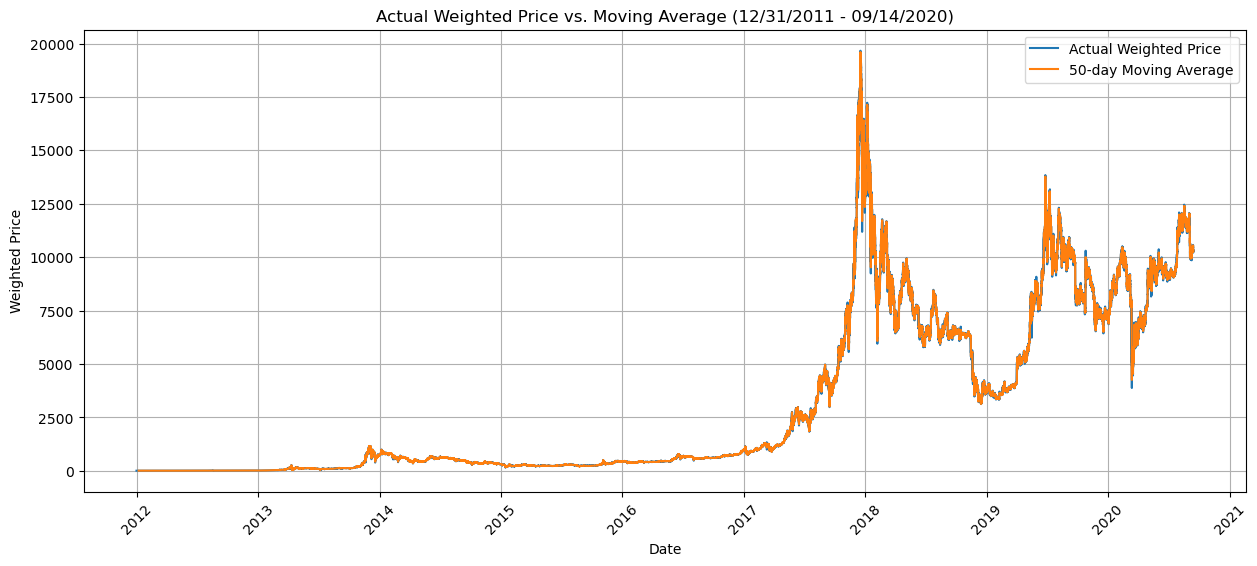

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the price column is 'Weighted_Price'

# Choose window size for moving average (experiment with different values)
window_size = 50  # Adjust this value as needed

# Calculate rolling mean (moving average)
df['Moving_Average'] = df['Weighted_Price'].rolling(window=window_size).mean()

# Plot actual data and moving average
plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Weighted_Price'], label='Actual Weighted Price')
plt.plot(df['DateTime'], df['Moving_Average'], label=f'{window_size}-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Weighted Price')
plt.title('Actual Weighted Price vs. Moving Average (12/31/2011 - 09/14/2020)')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adjust time format for the x-axis labels (optional)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))  # Year-Month format

# plt.tight_layout()
plt.show()


In [15]:
window_size = 50

# Calculate rolling mean (moving average)
df['Moving_Average'] = df['Weighted_Price'].rolling(window=window_size).mean()

# Exclude initial points for error calculation (adjust window_size as needed)
actual_values = df['Weighted_Price'].iloc[window_size-1:].to_numpy()  # Exclude first window_size-1 elements
predicted_values = df['Moving_Average'].iloc[window_size-1:].to_numpy()  # Exclude first window_size-1 elements

# ... rest of the code for error calculation and printing MAE/RMSE ...

def calculate_errors(actual_values, predicted_values):
  """
  Calculates absolute errors and squared errors for a given prediction.

  Args:
      actual_values (np.array): Array of actual values.
      predicted_values (np.array): Array of predicted values.

  Returns:
      tuple: A tuple containing the MAE (mean absolute error) and RMSE (root mean square error).
  """
  absolute_errors = np.abs(actual_values - predicted_values)
  squared_errors = (actual_values - predicted_values) ** 2
  mae = np.mean(absolute_errors)
  rmse = np.sqrt(np.mean(squared_errors))
  return mae, rmse

# # Prepare data for calculations
# actual_values = df['Weighted_Price'].to_numpy()  # Convert to NumPy array

# # Calculate moving averages (assuming you already have the 'Moving_Average' column)
# predicted_values = df['Moving_Average'].to_numpy()  # Moving average is the prediction

# Calculate errors and metrics
mae, rmse = calculate_errors(actual_values, predicted_values)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)


Mean Absolute Error (MAE): 11.951699810909687
Root Mean Square Error (RMSE): 31.70598016487938


# Winter's Exponential Smoothing

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


NameError: name 'matplotlib' is not defined

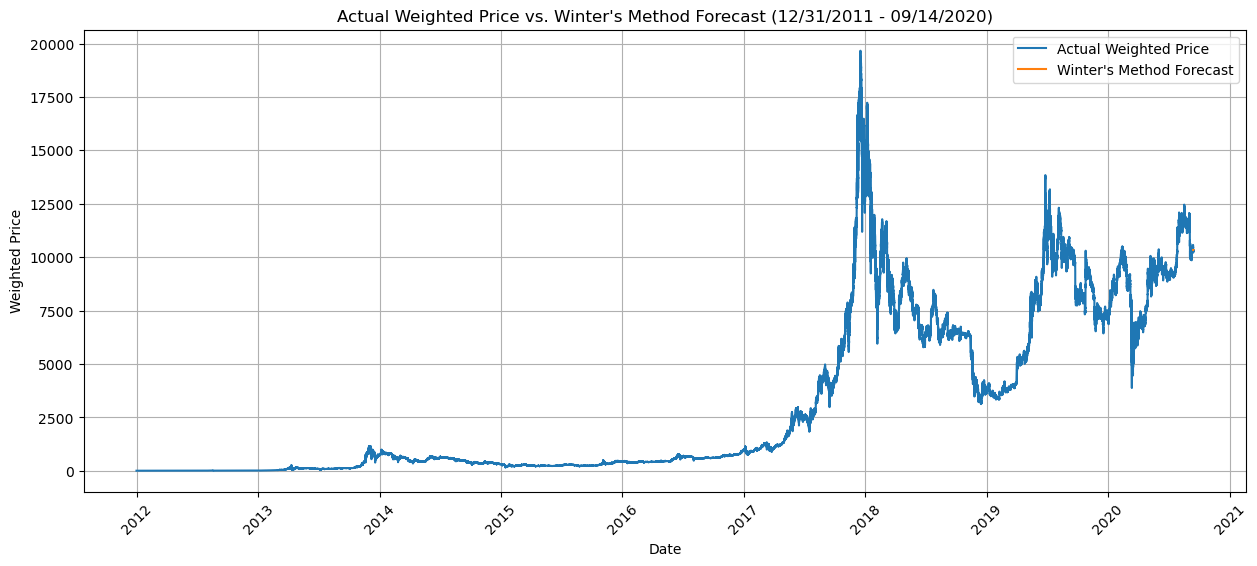

In [16]:
import statsmodels.tsa.holtwinters as hw

# Assuming your DataFrame is named 'df' and the price column is 'Weighted_Price'

# Specify seasonality (e.g., 'M' for monthly, 'Q' for quarterly, 'Y' for yearly)
seasonality = 'M'  # Adjust based on your data's seasonality

# Create a Holt-Winters model (additive)
model = hw.ExponentialSmoothing(df['Weighted_Price'], trend='additive', seasonal='add', seasonal_periods=12)  # Adjust for yearly seasonality if needed

# Fit the model to the data
model_fit = model.fit()

# Generate forecasts (adjust forecast_length as needed)
forecast_length = 12  # Number of future periods to forecast
forecast = model_fit.forecast(steps=forecast_length)

# Prepare data for plotting (assuming 'DateTime' column exists)
# Adjust the date format and column name if necessary
time_series = pd.to_datetime(df['DateTime'])
forecast_index = time_series[-forecast_length:]  # Forecast dates

# Plot actual data and forecast
plt.figure(figsize=(15, 6))
plt.plot(time_series, df['Weighted_Price'], label='Actual Weighted Price')
plt.plot(forecast_index, forecast, label='Winter\'s Method Forecast')
plt.xlabel('Date')
plt.ylabel('Weighted Price')
plt.title('Actual Weighted Price vs. Winter\'s Method Forecast (12/31/2011 - 09/14/2020)')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adjust time format for the x-axis labels (optional)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))  # Year-Month format

plt.tight_layout()
plt.show()


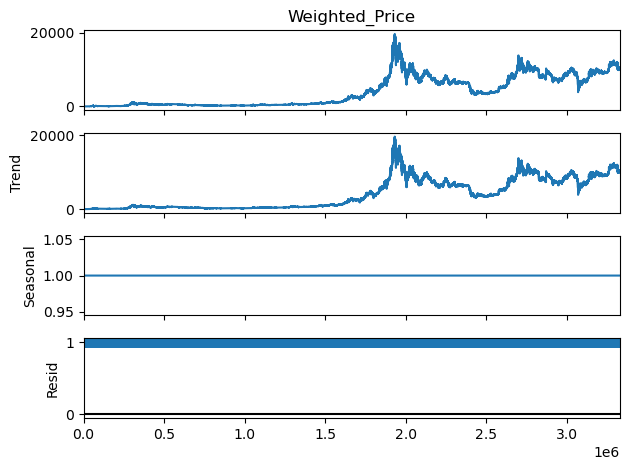

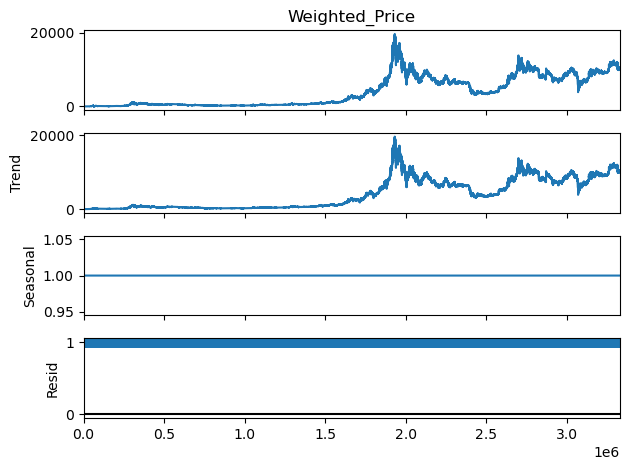

In [18]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

decompose_result = seasonal_decompose(df['Weighted_Price'],model='multiplicative',period=1)
decompose_result.plot()

In [23]:
df_daily = df.set_index('DateTime').resample('D').last()

,Unix_Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,cycle,trend,Moving_Average
DateTime,,,,,,,,,,,
2011-12-31,1.325351e+09,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,-0.072827,4.652827,NaN
2012-01-01,1.325458e+09,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000,0.077799,4.922201,NaN
2012-01-02,1.325535e+09,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000,0.001964,4.998036,NaN
2012-01-03,1.325612e+09,5.29,5.29,5.29,5.29,4.010815,21.217210,5.290000,0.110556,5.179444,NaN
2012-01-04,1.325699e+09,5.37,5.57,5.37,5.57,43.312196,235.747069,5.442972,-0.095631,5.538603,NaN
2012-01-05,1.325807e+09,6.65,6.65,6.65,6.65,0.499266,3.320117,6.650000,0.031476,6.618524,NaN
2012-01-06,1.325881e+09,6.00,6.00,6.00,6.00,1.000000,6.000000,6.000000,-0.523967,6.523967,6.010922
2012-01-07,1.325960e+09,6.80,6.80,6.80,6.80,0.295858,2.011834,6.800000,0.213457,6.586543,6.041722
2012-01-08,1.326065e+09,7.00,7.00,7.00,7.00,1.000000,7.000000,7.000000,0.294704,6.705296,6.108122
